In [1]:
# import required libraries for dataframe and visualization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')



In [2]:
retail = pd.read_excel('/Users/abdullahcetin/Documents/python /git_folder/Data_set/Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df_retail_copy=retail

In [4]:
print("************************** Shape **************************")
print(df_retail_copy.shape)
print("************************** info **************************")
print(df_retail_copy.info)
print("************************** Describe **************************")
print(df_retail_copy.describe())

************************** Shape **************************
(541909, 8)
************************** info **************************
<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE    

In [5]:
print(round(100*(df_retail_copy.isnull().sum())/len(df_retail_copy), 2))

df_retail_copy = df_retail_copy.dropna()

print(df_retail_copy.shape)

df_retail_copy["CustomerID"] = df_retail_copy["CustomerID"].astype(str)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64
(406829, 8)


In [6]:
#Return invoices
df_retail_copy[df_retail_copy["InvoiceNo"].str.contains("C", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [7]:
#Deleting return invoice 
df_retail_copy=df_retail_copy[~df_retail_copy["InvoiceNo"].str.contains("C", na=False)] 

In [8]:
# amount informaiton
df_retail_copy["Amount"] = df_retail_copy["Quantity"]*df_retail_copy["UnitPrice"]
df_retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
rfm_m = df_retail_copy.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_f = df_retail_copy.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)
merged_rfm=pd.merge(rfm_m,rfm_f, on='CustomerID', how="inner")
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [10]:
df_retail_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   Amount       397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB


In [11]:
#### changing datetime type
df_retail_copy['InvoiceDate'] = pd.to_datetime(df_retail_copy['InvoiceDate'],format='%d-%m-%Y %H:%M')
df_retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [49]:
# most recent transaction
max_date = max (df_retail_copy['InvoiceDate'])

# Calculate how long ago the last transaction was made

df_retail_copy["Diff"] =(max_date - df_retail_copy[ 'InvoiceDate']).dt.days

df_retail_copy.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [13]:
rfm_p = df_retail_copy.groupby('CustomerID')['Diff'].min().reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [14]:
merged_rfm = merged_rfm.merge(rfm_p, on='CustomerID')
merged_rfm.rename(columns={'Diff' : 'Recency'}, inplace=True)
merged_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [15]:
# Amount can not equal 0
merged_rfm=merged_rfm[merged_rfm["Amount"] != 0]

In [16]:
# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_rfm[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [17]:
# Removing (statistical) outliers for Amount
Q1 = merged_rfm.Amount.quantile(0.01)
Q3 = merged_rfm.Amount.quantile(0.99)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Amount >= Q1 - 1.5*IQR) & (merged_rfm.Amount <= Q3 + 1.5*IQR)]



# Removing (statistical) outliers for Recency
Q1 = merged_rfm.Recency.quantile(0.01)
Q3 = merged_rfm.Recency.quantile(0.99)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Recency >= Q1 - 1.5*IQR) & (merged_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = merged_rfm.Frequency.quantile(0.01)
Q3 = merged_rfm.Frequency.quantile(0.99)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Frequency >= Q1 - 1.5*IQR) & (merged_rfm.Frequency <= Q3 + 1.5*IQR)]

In [18]:
 #Rescaling the attributes
merged_rfm = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_rfm)
rfm_df_scaled.shape

(4314, 3)

In [19]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,0.936113,0.827026,-0.909290
1,0.083546,-0.429130,-0.179404
2,0.070079,-0.079735,-0.739317
3,-0.412789,-0.545594,2.170229
4,0.324038,0.020091,-0.569343


In [20]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [21]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [22]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd, 
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

For n_clusters=2, the Elbow score is 8571.34498317078
For n_clusters=3, the Elbow score is 5224.989256102478
For n_clusters=4, the Elbow score is 3858.482140251106
For n_clusters=5, the Elbow score is 3016.159841875569
For n_clusters=6, the Elbow score is 2598.442317117954
For n_clusters=7, the Elbow score is 2198.2305273996835
For n_clusters=8, the Elbow score is 1842.6150942229758


In [23]:
ssd

[8571.34498317078,
 5224.989256102478,
 3858.482140251106,
 3016.159841875569,
 2598.442317117954,
 2198.2305273996835,
 1842.6150942229758]

In [24]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5982545224420245
For n_clusters=3, the silhouette score is 0.5367831988958881
For n_clusters=4, the silhouette score is 0.5442995818731331
For n_clusters=5, the silhouette score is 0.5035701591362707
For n_clusters=6, the silhouette score is 0.445936192485115
For n_clusters=7, the silhouette score is 0.44957176342477345
For n_clusters=8, the silhouette score is 0.43264130681367174


In [25]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [26]:
kmeans.labels_

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [27]:
# assign the label
merged_rfm['Cluster_Id'] = kmeans.labels_
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id
1,4310.00,182,1,1
2,1797.24,31,74,1
3,1757.55,73,18,1
4,334.40,17,309,0
5,2506.04,85,35,1


In [28]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Amount',
             title="Cluster Id vs Amount Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster_Id')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [29]:
fig = px.scatter(merged_rfm, x='Cluster_Id', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)

fig.show()

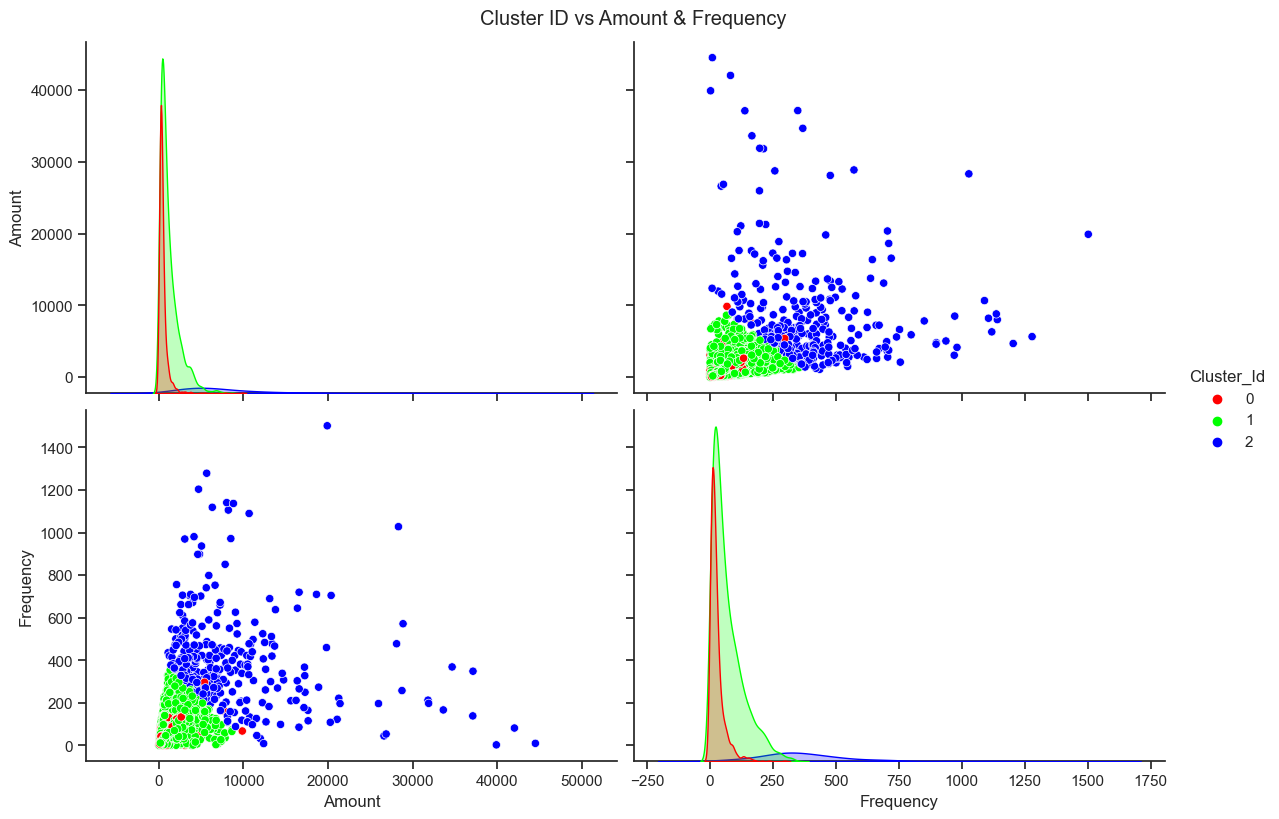

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

In [31]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Frequency',
             title="Cluster Id vs Frequency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [32]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Recency',
             title="Cluster Id vs Recency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [33]:
# Selecting the two features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(merged_rfm, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()

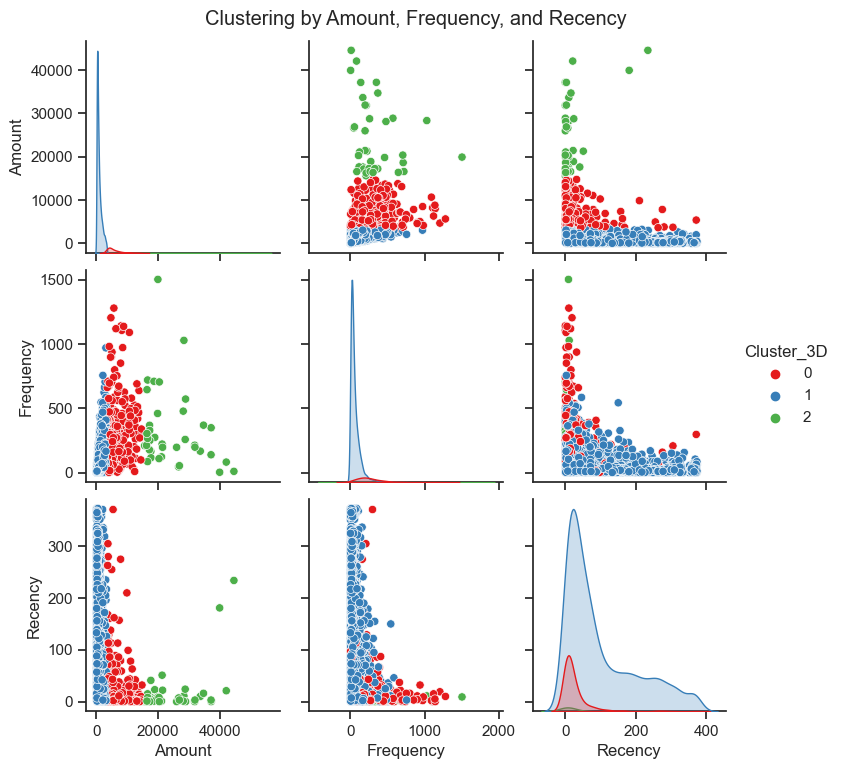

In [34]:
# Selecting the three features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()

In [35]:
import plotly.express as px

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

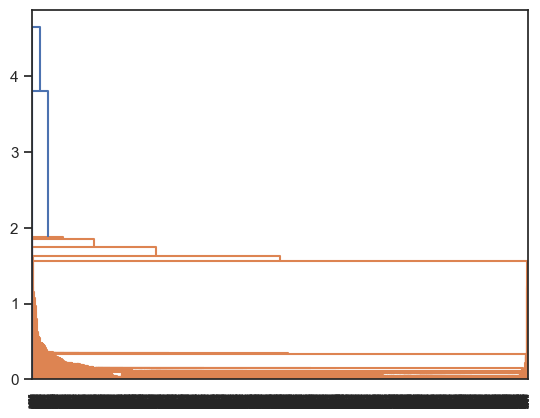

In [36]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

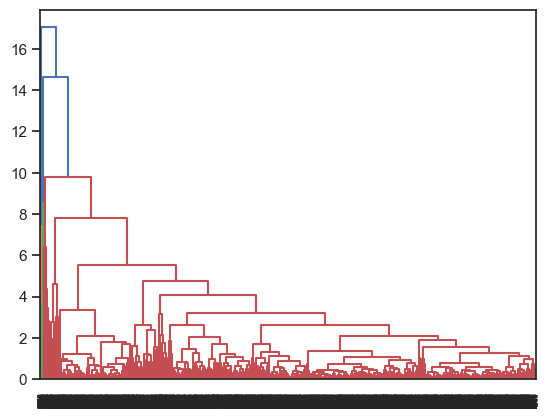

In [37]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

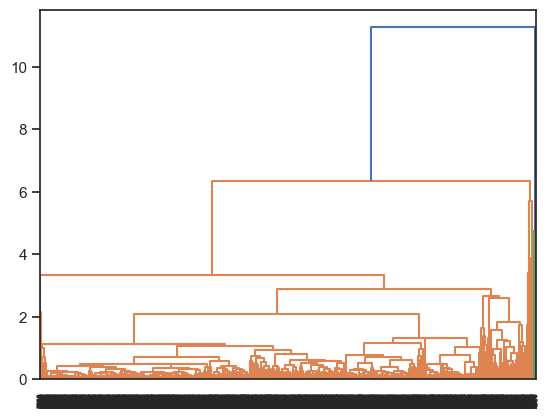

In [38]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [39]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Assign cluster labels

merged_rfm['Cluster_Labels'] = cluster_labels
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id,Cluster_2D,Cluster_3D,Cluster_Labels
1,4310.00,182,1,1,2,2,0
2,1797.24,31,74,1,0,0,0
3,1757.55,73,18,1,0,0,0
4,334.40,17,309,0,0,0,0
5,2506.04,85,35,1,0,0,0


In [41]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Amount',
             title="Cluster Labels vs Amount Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Amount': 'Amount'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [42]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Frequency',
             title="Cluster Labels vs Frequency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [43]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Recency',
             title="Cluster Labels vs Recency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

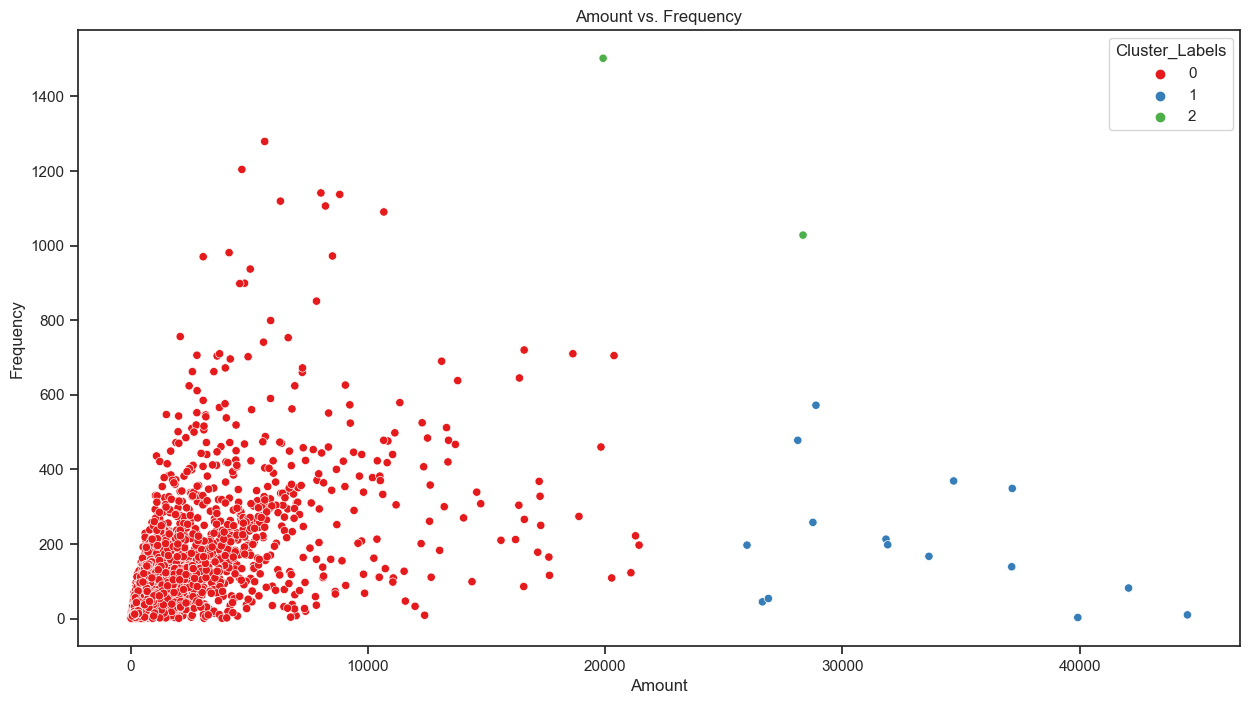

In [44]:
# Pairwise scatter plots for clustering (2D)
plt.figure(figsize=(15, 8))  # Adjust the figure size here

# Amount vs. Frequency
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Frequency');

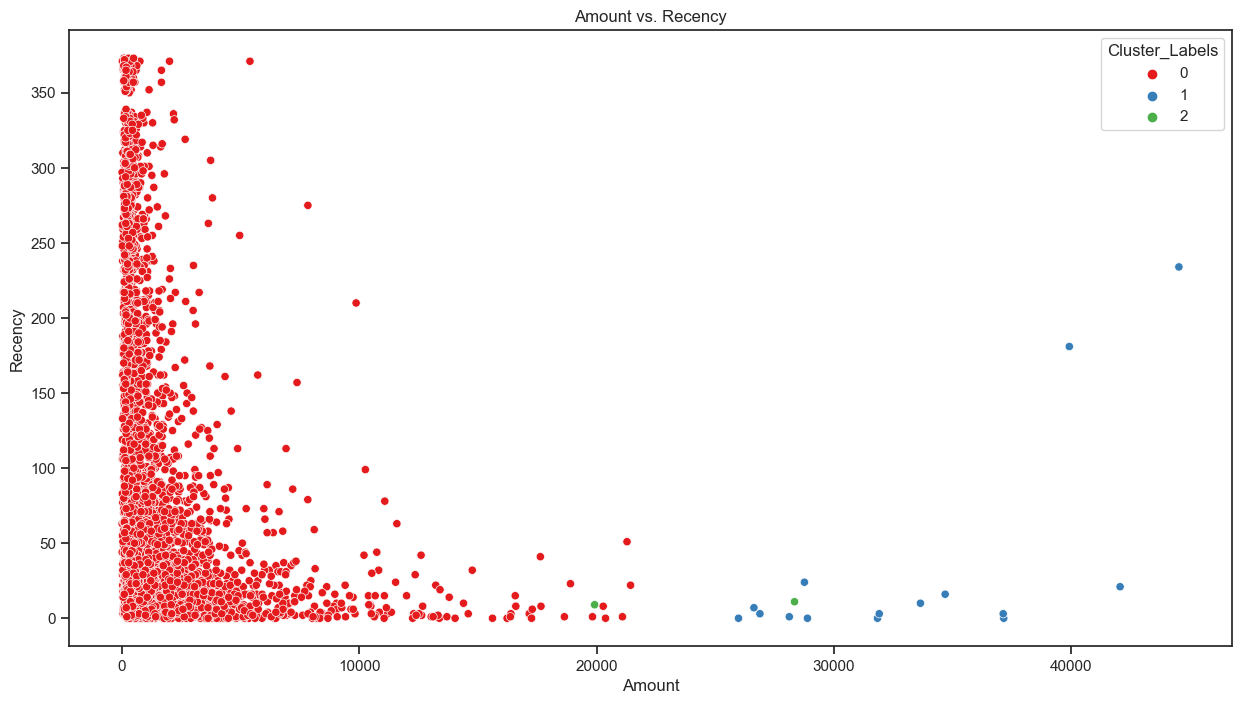

In [45]:
plt.figure(figsize=(15, 8))  # Adjust the figure size here

sns.scatterplot(x='Amount', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Recency');

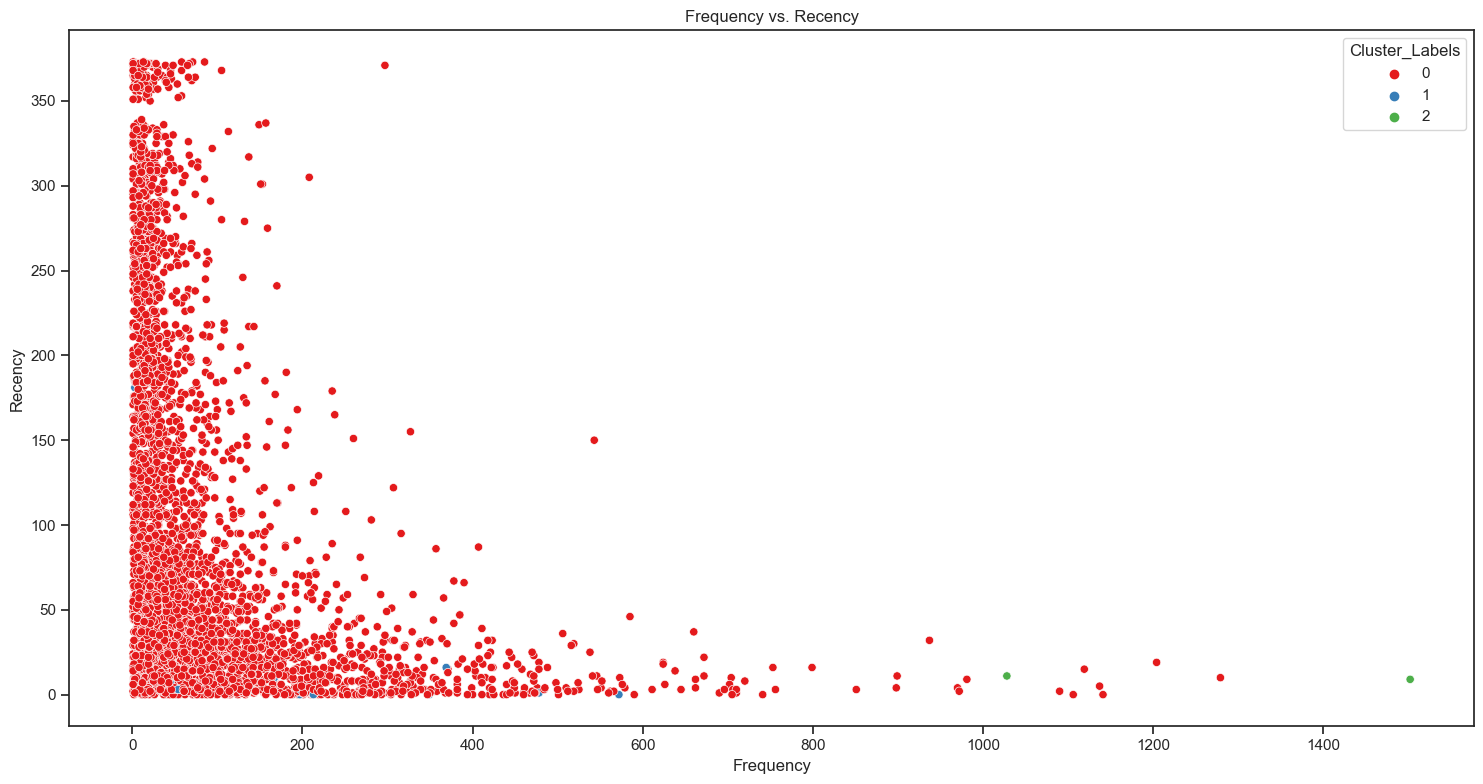

In [46]:
# Frequency vs. Recency
plt.figure(figsize=(15, 8))  # Adjust the figure size here
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Frequency vs. Recency')

plt.tight_layout()
plt.show()


In [47]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

In [48]:
merged_rfm[merged_rfm["Cluster_Labels"] != 0]

,Amount,Frequency,Recency,Cluster_Id,Cluster_2D,Cluster_3D,Cluster_Labels
453,42055.96,82,21,2,1,2,1
558,28337.38,1028,11,2,1,2,2
570,28882.44,572,0,2,1,2,1
796,28117.04,478,1,2,1,2,1
1059,25977.16,197,0,2,1,2,1
1070,37153.85,349,0,2,1,2,1
1714,28754.11,258,24,2,1,2,1
1965,19914.44,1502,9,2,1,2,2
2012,39916.50,3,181,2,1,2,1
2503,44534.30,10,234,2,1,2,1
